<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Euler_CachorroCoelho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cálculo Numérico**

José Claudinei Ferreira

Universidade Federal de Alfenas

#**O problema do cachorro e do coelho**

Versão simplificada do [problema do cachorro e do coelho](https://github.com/j-claudinei-f/j-claudinei-f/blob/main/Cachorro_coelho_introducao_EDO.ipynb) pelo método de
Euler.

No problema em questão, um coelho desloca-se sobre o eixo $y$, num trajeto da forma $R(x)=(0,r(x))$ e um cachorro desloca-se no plano $xy$, num trajeto $D(x)=(x,y(x))$. Tem-se que $R(80)=(0,0)$ e  $D(80)=(80,0)$. Ainda, o cachorro sempre desloca-se na direção do coelho e ao dobro da velocidade dele.

Se considerarmos a velocidade do coelho, em função de $x$, teremos que ela é dada pela expressão de $R'(x)=(0,r'(x))$ e a velocidade do cachorro, em função de $x$, é dada pela expressão de $D'(x)=(1,y'(x))$.

A velocidade do cachorro ser odobro da velocidade do coelho pode ser traduzida como $\|D'(x)\|=2\|R'(x)\|$, ou $\displaystyle \frac{1}{2}\|D'(x)\|=\|R'(x)\|$, em que $\|(p,q)\|=\sqrt{p^2+q^2}$ é o módulo (ou norma) usual.

Vamos usar a notação $u(x)=(y(x),r(x))$. Podemos então encontrar uma equação diferencial $$\begin{cases}u'(x)&=&F(x,u)\\\\
u(80)&=&(0,0)\end{cases},\tag{1}$$ para modelar nosso problema.

Das considerações anteriores, temos que $$F(x,u)=	\left[\begin{array}{llll}\displaystyle \frac{dy}{dx}\\\\\displaystyle\frac{dr}{dx}\end{array}\right]=\left[\begin{array}{llll}\displaystyle\frac{y(x)-r(x)}{x}\\\\-\displaystyle\frac{1}{2}\sqrt{1+\left(\frac{y(x)-r(x)}{x}\right)^2}\end{array}\right],$$ serve como modelo.

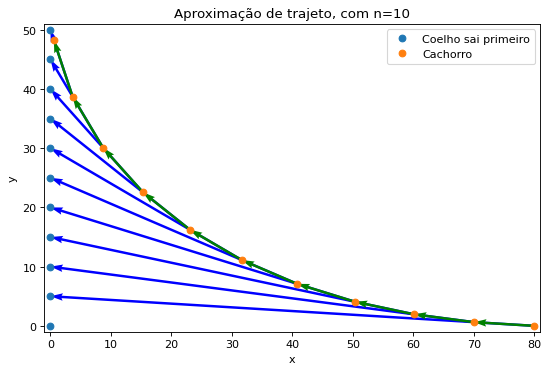

O método de Euler consiste em usar a aproximação $$u(x+t)\approx u(x)+u'(x)t,\tag{2}$$ que vem da definição da derivada $$u'(x)=\lim_{t\to 0}\frac{u(x+t)-u(x)}{t}.$$

Para resolver numericamente a Equação $(1)$, tomamos $t=-h$, em que $h=\frac{80}{n}$, para alguma escolha do número natural $n$, suficientemente grande.

Tomamos também $x_j=80-jh$, para $j\in \{0,\,1,\,\ldots,\,n-1\}$.

Juntando as expressões $(1)$ e $(2)$, obtemos pelo método de Euler, as expressões:
$$\begin{cases}u_0&=&u(x_0)\\\\
u_1&=&u_0-hF(x_0,u_0)\approx u(x_1)\\\\
u_2&=&u_1-hF(x_1,u_1)\approx u(x_2)\\\\\vdots&\vdots&\vdots\\\\
u_{j+1}&=&u_j-hF(x_j,u_j)\approx u(x_j)\end{cases}$$

Definições em Pythom:

In [1]:
        # Dados iniciais
x0=80   # x inicial
xn=0    # x final
n=40    # quantidade de passos (iterações)
h=-(xn-x0)/n  # tamanho do passo
y0=0    # y inicial
r0=0    # r inicial.  Segue que (y0,r0)=u0 é o u inicial

In [2]:
import numpy as np  # Vamos somar vetores

def F(x,u):
  y=u[0]
  r=u[1]
  dydx=(y-r)/x
  drdx=-((1+dydx**2)**0.5)/2
  return np.array([dydx,drdx])

Teste de $F(x=80,u=(35,45))$:

In [3]:
F(x=80,u=[35,45])

array([-0.125     , -0.50389111])

Resolvendo a equação pelo método de Euler:

In [4]:
u0=np.array([y0,r0])
u0

array([0, 0])

In [5]:
u1=u0-h*F(x0,u0)
u1

array([0., 1.])

In [6]:
x1=x0-h
u2=u1-h*F(x1,u1)
u2

array([0.02564103, 2.00008218])

Automatizando...

In [7]:
u=[u0,u1,u2] # Definição da matriz cujas linhas são u0=(y0,r0),
             # u1=(y1,r1), u2=(y2,r2).
x2=x1-h

x=[x0,x1,x2]

print('u=',u)

print('x=',x)

u= [array([0, 0]), array([0., 1.]), array([0.02564103, 2.00008218])]
x= [80, 78.0, 76.0]


In [8]:
for j in range(2,n): # Para j variando de 2 até n-1.
  u.append(u[j]-h*F(x[j],u[j]))         # u_(j+1)=u_j-hF(x_j,u_j)
  x.append(x[j]-h)                      # x_(j+1)=x_j-h

Separando coordenadas de $u(x)=(y(x),r(x))$:

In [9]:
u=np.array(u)
u=np.transpose(u)  # Transpõe a matriz u.

y=u[0]
r=u[1]

Fazendo gráfico:

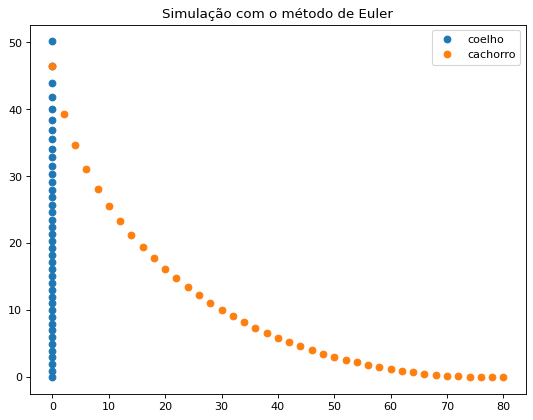

In [12]:
import matplotlib.pyplot as plt # Para fazer gráficos.

Fig=plt.figure(figsize=(8,6), dpi=80)
plt.plot(0*np.array(x),r,'o')
plt.plot(x,y,'o')
plt.title('Simulação com o método de Euler')
plt.legend(['coelho','cachorro'])
plt.show()

Podemos observar na simulação que o cachorro não alcança o coelho, antes dele passar da posição $(0,50)$, onde estaria a sua toca.